# Assignment
### A : Use the dataset from the paper: Dataset for multi-channel surface electromyography (sEMG) signals of hand gestures.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/csv/3_filtered.csv')
print(data.info())
print(f"Number of attributes: {data.shape[1]}")
print(f"Number of instances: {data.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279999 entries, 0 to 1279998
Data columns (total 4 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   -0.0704784028272549   1279999 non-null  float64
 1   -4.3537957071209      1279999 non-null  float64
 2   -3.02263868748751     1279999 non-null  float64
 3   0.000305101310940497  1279999 non-null  float64
dtypes: float64(4)
memory usage: 39.1 MB
None
Number of attributes: 4
Number of instances: 1279999


In [ ]:
df=np.array(data)


In [ ]:
df1=pd.DataFrame(df)
df1


,0,1,2,3
0,-0.070693,-4.353568,-3.021859,0.000223
1,-0.070446,-4.357967,-3.020771,-0.000010
2,-0.066411,-4.367079,-3.017767,-0.000354
3,-0.059984,-4.376192,-3.014445,-0.000614
4,-0.059842,-4.381994,-3.012279,-0.000726
...,...,...,...,...
1279994,-0.000133,0.008526,0.001389,-0.004631
1279995,-0.003116,-0.001690,-0.000082,-0.004635
1279996,-0.007943,-0.015947,-0.002762,-0.003688
1279997,-0.012394,-0.020607,-0.005058,-0.002155


In [ ]:
print(df1.info())
print(f"Number of attributes: {df1.shape[1]}")
print(f"Number of instances: {df1.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279999 entries, 0 to 1279998
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1279999 non-null  float64
 1   1       1279999 non-null  float64
 2   2       1279999 non-null  float64
 3   3       1279999 non-null  float64
dtypes: float64(4)
memory usage: 39.1 MB
None
Number of attributes: 4
Number of instances: 1279999


### D. Signal Plotting
Read and plot a signal from each of the channels.

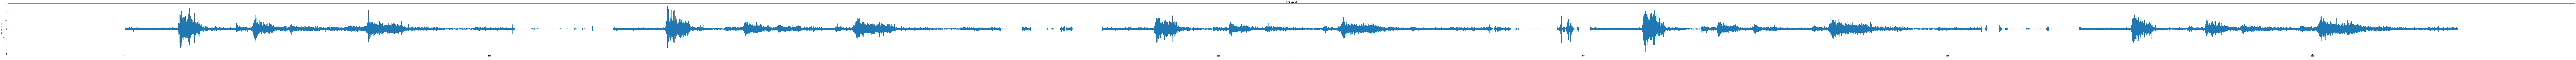

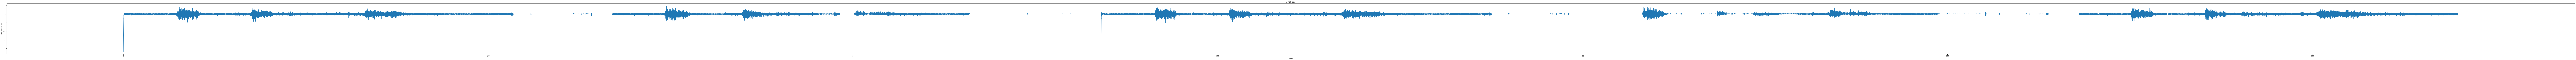

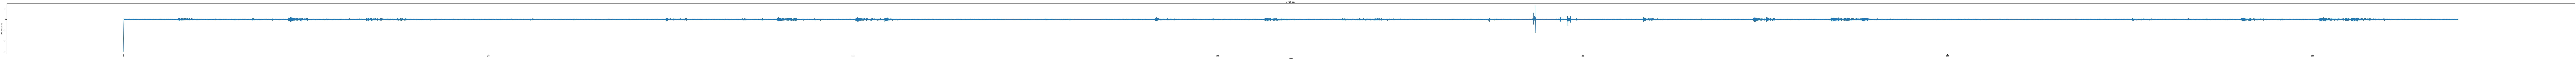

In [ ]:


# Assuming EMG data is in a column named 'EMG'
for i in range(3):
  plt.figure(figsize=(300, 6))
  plt.plot(df1.index/2000, df1[i])
  plt.xlabel('Time')
  plt.ylabel('EMG Amplitude')
  plt.title('EMG Signal')
  plt.show()




# New section

In [ ]:
n = len(df)

# Add the time row
df1['Time (sec)'] = df1.index.to_series().apply(lambda x: x / 2000)

# If you want the 'Time (sec)' as the first column
df1 = df1[['Time (sec)'] + [col for col in df1.columns if col != 'Time (sec)']]

print(df1.head())

   Time (sec)         0         1         2         3
0      0.0000 -0.070693 -4.353568 -3.021859  0.000223
1      0.0005 -0.070446 -4.357967 -3.020771 -0.000010
2      0.0010 -0.066411 -4.367079 -3.017767 -0.000354
3      0.0015 -0.059984 -4.376192 -3.014445 -0.000614
4      0.0020 -0.059842 -4.381994 -3.012279 -0.000726


In [ ]:
cycle_duration = 134  # 104 sec motion + 30 sec rest
motion_duration = 100  # Duration of motion in each cycle
pd.options.mode.copy_on_write = True
# Add the 'Motion' column
df1['Motion'] = df1.index.to_series().apply(lambda x: 'Motion' if (x / 2000) % cycle_duration < motion_duration else 'No Motion')


In [ ]:
df1['Motion'].unique()

array(['Motion', 'No Motion'], dtype=object)

In [ ]:
df1.head()

,Time (sec),0,1,2,3,Motion
0,0.0000,-0.070693,-4.353568,-3.021859,0.000223,Motion
1,0.0005,-0.070446,-4.357967,-3.020771,-0.000010,Motion
2,0.0010,-0.066411,-4.367079,-3.017767,-0.000354,Motion
3,0.0015,-0.059984,-4.376192,-3.014445,-0.000614,Motion
4,0.0020,-0.059842,-4.381994,-3.012279,-0.000726,Motion


In [ ]:
df2=df1[df1['Motion']=='Motion']
df2

,Time (sec),0,1,2,3,Motion
0,0.0000,-0.070693,-4.353568,-3.021859,0.000223,Motion
1,0.0005,-0.070446,-4.357967,-3.020771,-0.000010,Motion
2,0.0010,-0.066411,-4.367079,-3.017767,-0.000354,Motion
3,0.0015,-0.059984,-4.376192,-3.014445,-0.000614,Motion
4,0.0020,-0.059842,-4.381994,-3.012279,-0.000726,Motion
...,...,...,...,...,...,...
1271995,635.9975,-0.014870,-0.063252,-0.005608,0.000407,Motion
1271996,635.9980,-0.037365,-0.118387,-0.004488,0.000672,Motion
1271997,635.9985,-0.041768,-0.114659,-0.009184,0.000473,Motion
1271998,635.9990,-0.033592,-0.071472,-0.014118,0.000063,Motion


In [ ]:
df2['Motion'].unique()

array(['Motion'], dtype=object)

In [ ]:
df2.reset_index(drop=True, inplace=True)
df2

,Time (sec),0,1,2,3,Motion
0,0.0000,-0.070693,-4.353568,-3.021859,0.000223,Motion
1,0.0005,-0.070446,-4.357967,-3.020771,-0.000010,Motion
2,0.0010,-0.066411,-4.367079,-3.017767,-0.000354,Motion
3,0.0015,-0.059984,-4.376192,-3.014445,-0.000614,Motion
4,0.0020,-0.059842,-4.381994,-3.012279,-0.000726,Motion
...,...,...,...,...,...,...
999995,635.9975,-0.014870,-0.063252,-0.005608,0.000407,Motion
999996,635.9980,-0.037365,-0.118387,-0.004488,0.000672,Motion
999997,635.9985,-0.041768,-0.114659,-0.009184,0.000473,Motion
999998,635.9990,-0.033592,-0.071472,-0.014118,0.000063,Motion


In [ ]:
df2.iloc[1,5]

'Motion'

In [ ]:
df2['Motion'] = df2.index.to_series().apply(lambda x: 'Rest' if (x / 2000) % 10 < 4 else 'Motion')



In [ ]:
df3=df2.iloc[0:30000,:]
df3

,Time (sec),0,1,2,3,Motion
0,0.0000,-0.070693,-4.353568,-3.021859,0.000223,Rest
1,0.0005,-0.070446,-4.357967,-3.020771,-0.000010,Rest
2,0.0010,-0.066411,-4.367079,-3.017767,-0.000354,Rest
3,0.0015,-0.059984,-4.376192,-3.014445,-0.000614,Rest
4,0.0020,-0.059842,-4.381994,-3.012279,-0.000726,Rest
...,...,...,...,...,...,...
29995,14.9975,-0.189526,0.006171,0.037646,-0.003522,Motion
29996,14.9980,-0.172738,0.025453,0.034136,-0.003028,Motion
29997,14.9985,-0.120952,-0.020619,0.027076,-0.002995,Motion
29998,14.9990,-0.080768,-0.096449,0.024600,-0.002382,Motion


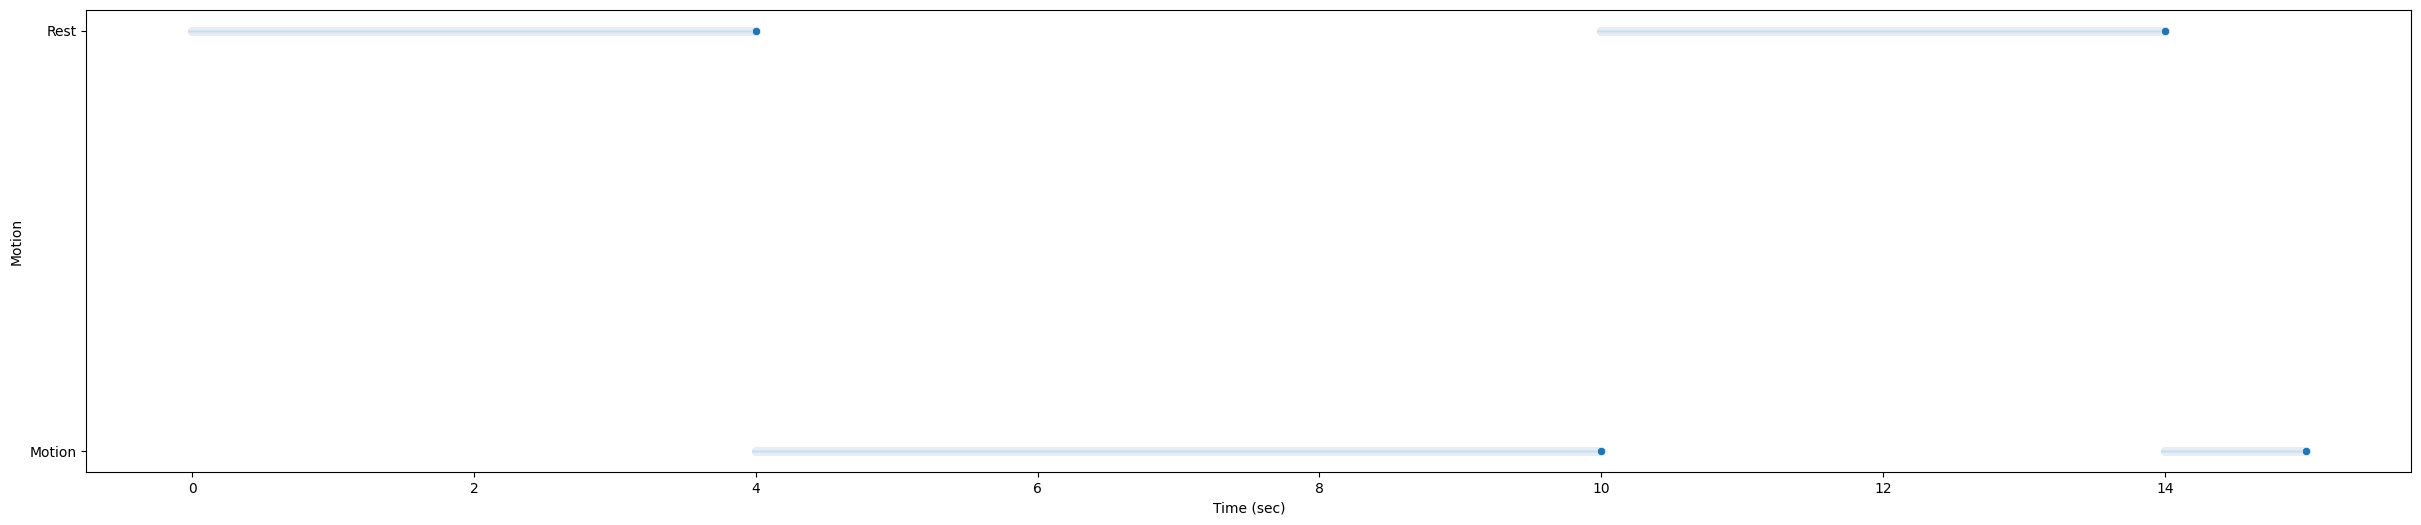

In [ ]:
sns.scatterplot(data=df3, x="Time (sec)", y="Motion")
fig = plt.gcf()
fig.set_size_inches(30, 6)
plt.show()

In [ ]:
df2=df2[df2['Motion']=='Motion']
df2.reset_index(drop=True, inplace=True)
df2

,Time (sec),0,1,2,3,Motion
0,4.0000,-0.005025,-0.003175,-0.003472,0.010719,Motion
1,4.0005,0.030721,0.005937,-0.005875,0.010847,Motion
2,4.0010,0.074173,0.016046,-0.005074,0.007823,Motion
3,4.0015,0.103467,0.030130,0.000864,0.002093,Motion
4,4.0020,0.100195,0.041923,0.008004,-0.004260,Motion
...,...,...,...,...,...,...
599995,635.9975,-0.014870,-0.063252,-0.005608,0.000407,Motion
599996,635.9980,-0.037365,-0.118387,-0.004488,0.000672,Motion
599997,635.9985,-0.041768,-0.114659,-0.009184,0.000473,Motion
599998,635.9990,-0.033592,-0.071472,-0.014118,0.000063,Motion


In [ ]:
df2.iloc[0:10,5]

,Motion
0,Motion
1,Motion
2,Motion
3,Motion
4,Motion
5,Motion
6,Motion
7,Motion
8,Motion
9,Motion


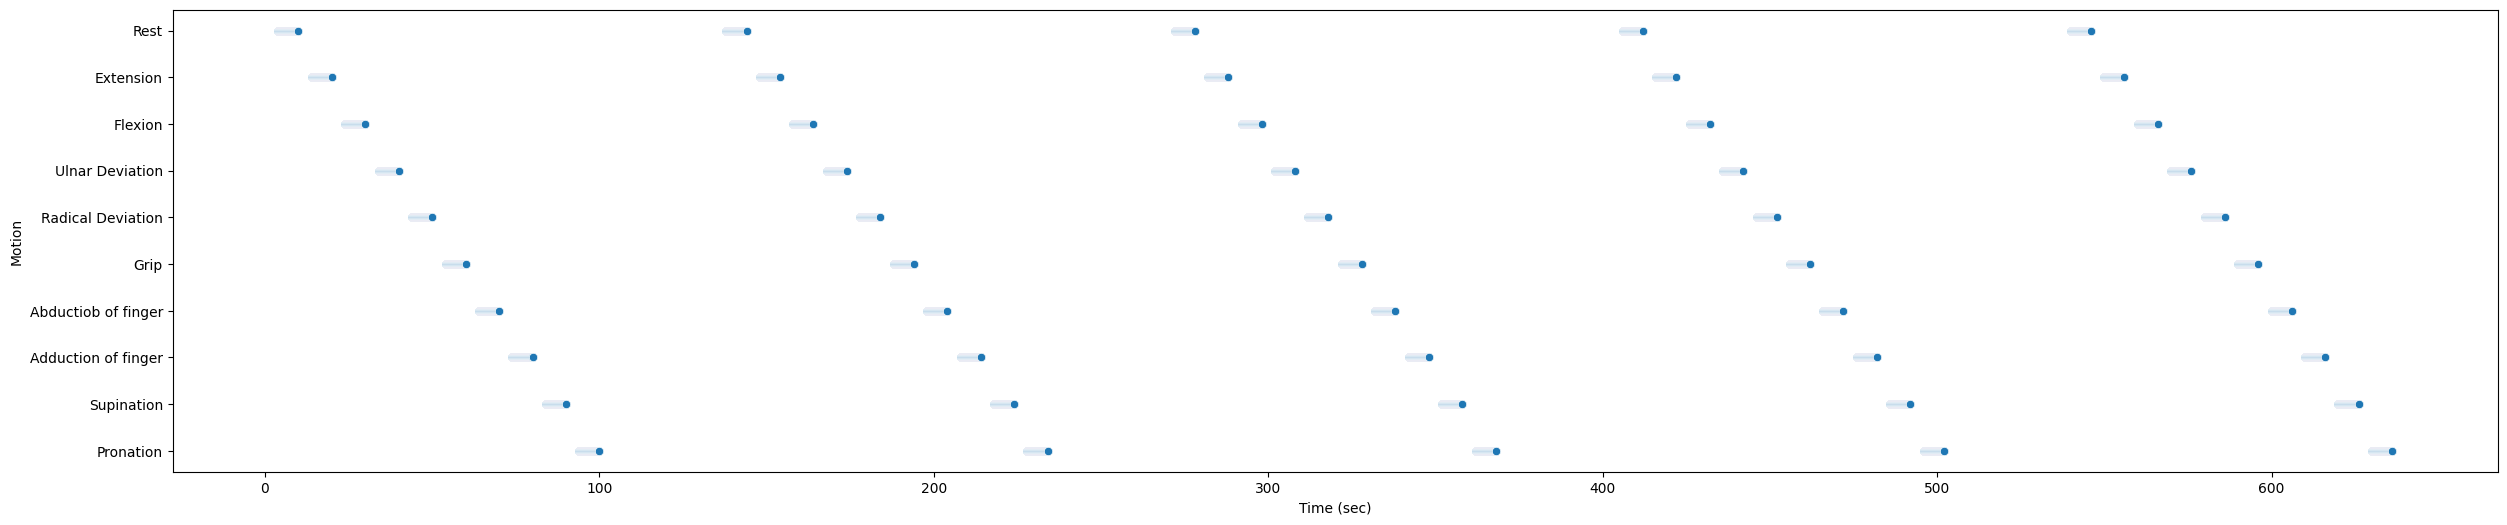

In [ ]:
lst=['Rest','Extension','Flexion','Ulnar Deviation','Radical Deviation','Grip','Abductiob of finger','Adduction of finger','Supination','Pronation','Rest','Extension','Flexion','Ulnar Deviation','Radical Deviation','Grip','Abductiob of finger','Adduction of finger','Supination','Pronation','Rest','Extension','Flexion','Ulnar Deviation','Radical Deviation','Grip','Abductiob of finger','Adduction of finger','Supination','Pronation','Rest','Extension','Flexion','Ulnar Deviation','Radical Deviation','Grip','Abductiob of finger','Adduction of finger','Supination','Pronation','Rest','Extension','Flexion','Ulnar Deviation','Radical Deviation','Grip','Abductiob of finger','Adduction of finger','Supination','Pronation' ]
for i in range(0,len(lst)):
  df2.iloc[i*6*2000:(i+1)*6*2000,5]=lst[i]
sns.scatterplot(data=df2, x="Time (sec)", y="Motion")
fig = plt.gcf()
fig.set_size_inches(30, 6)
plt.show()




In [ ]:
df2['Motion'].value_counts()

,count
Motion,
Rest,60000
Extension,60000
Flexion,60000
Ulnar Deviation,60000
Radical Deviation,60000
Grip,60000
Abductiob of finger,60000
Adduction of finger,60000
Supination,60000


In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
def extract_features(segment):
    """
    Extract 20 time-domain features from a signal segment.
    """
    mean_val = np.mean(segment)
    median_val = np.median(segment)
    variance_val = np.var(segment)
    skewness_val = skew(segment)
    kurtosis_val = kurtosis(segment)
    rms_val = np.sqrt(np.mean(segment**2))
    mav_val = np.mean(np.abs(segment))
    se_val = np.sum(segment**2)
    zc_val = np.sum(np.diff(np.sign(segment)) != 0)
    sc_val = np.sum(np.diff(np.sign(np.diff(segment))) != 0)
    wamp_val = np.sum(np.abs(np.diff(segment)) > 0.02)  # Threshold can be adjusted
    aac_val = np.mean(np.abs(np.diff(segment)))
    logd_val = np.exp(np.mean(np.log(np.abs(segment) + 1e-6)))
    ssi_val = np.sum(segment**2)
    iemg_val = np.sum(np.abs(segment))

    # Add any additional feature extraction methods here if needed

    features = [
        mean_val, median_val, variance_val, skewness_val, kurtosis_val, rms_val,
        mav_val, se_val, zc_val, sc_val, wamp_val, aac_val, logd_val, ssi_val, iemg_val
    ]

    return features

In [ ]:
def segment_signal_and_extract_features(df, sensor_columns, Nseg):
    feature_dfs = []

    for i, column in enumerate(sensor_columns):
        signal = df[column].values  # Get the EMG signal from the DataFrame for the current sensor
        segment_length = len(signal) // Nseg
        feature_list = []

        for j in range(Nseg):
            segment = signal[j * segment_length : (j + 1) * segment_length]
            features = extract_features(segment)
            feature_list.append(features)

        sensor_feature_df = pd.DataFrame(
            feature_list,
            columns=[
                f'mean_{i+1}', f'median_{i+1}', f'variance_{i+1}', f'skewness_{i+1}',
                f'kurtosis_{i+1}', f'rms_{i+1}', f'mav_{i+1}', f'se_{i+1}', f'zc_{i+1}',
                f'sc_{i+1}', f'wamp_{i+1}', f'aac_{i+1}', f'logd_{i+1}', f'ssi_{i+1}',
                f'iemg_{i+1}'
            ]
        )

        feature_dfs.append(sensor_feature_df)

    # Combine the features from all sensors
    combined_feature_df = pd.concat(feature_dfs, axis=1)

    return combined_feature_df

In [ ]:
sensor_columns = [0,1, 2, 3]
featuredf=segment_signal_and_extract_features(df2,sensor_columns,1200)
featuredf


<ipython-input-24-18c1984b30c9>:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_val = skew(segment)
<ipython-input-24-18c1984b30c9>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis_val = kurtosis(segment)


,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,rms_4,mav_4,se_4,zc_4,sc_4,wamp_4,aac_4,logd_4,ssi_4,iemg_4
0,0.001410,0.004451,0.000658,-0.338313,1.617836,0.025687,0.019669,0.329923,39,132,...,0.003169,0.002342,0.005023,72,102,0,0.001120,0.001465,0.005023,1.170985
1,-0.000969,-0.003467,0.000564,0.251223,0.127020,0.023775,0.018717,0.282622,50,116,...,0.002966,0.002131,0.004399,74,105,0,0.001012,0.001284,0.004399,1.065252
2,-0.000334,-0.001809,0.000429,0.230630,-0.010362,0.020722,0.016692,0.214708,60,115,...,0.003459,0.002515,0.005983,73,97,0,0.001152,0.001454,0.005983,1.257551
3,-0.000145,-0.000349,0.000435,0.099669,0.756266,0.020853,0.016162,0.217426,60,117,...,0.003037,0.002234,0.004612,76,106,0,0.001013,0.001375,0.004612,1.116878
4,0.000061,-0.000630,0.000519,0.426986,0.920610,0.022773,0.017376,0.259308,63,118,...,0.003146,0.002172,0.004947,74,111,0,0.000987,0.001297,0.004947,1.085922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.000031,-0.002401,0.000953,0.335310,1.321965,0.030872,0.022915,0.476530,58,105,...,0.004847,0.003803,0.011749,82,112,0,0.001941,0.002428,0.011749,1.901340
1196,-0.000013,-0.002767,0.000792,0.761048,1.805721,0.028151,0.021463,0.396239,56,108,...,0.004736,0.003576,0.011213,90,116,0,0.001988,0.002245,0.011213,1.788229
1197,-0.000167,-0.000065,0.000789,-0.247893,0.395538,0.028094,0.021524,0.394622,69,103,...,0.004319,0.003204,0.009329,77,100,0,0.001636,0.001947,0.009329,1.601932
1198,-0.000339,-0.000979,0.000943,-0.389800,1.461061,0.030714,0.023363,0.471672,45,98,...,0.004909,0.003447,0.012048,93,117,0,0.002009,0.001968,0.012048,1.723580


In [ ]:
featuredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mean_1      1200 non-null   float64
 1   median_1    1200 non-null   float64
 2   variance_1  1200 non-null   float64
 3   skewness_1  1200 non-null   float64
 4   kurtosis_1  1200 non-null   float64
 5   rms_1       1200 non-null   float64
 6   mav_1       1200 non-null   float64
 7   se_1        1200 non-null   float64
 8   zc_1        1200 non-null   int64  
 9   sc_1        1200 non-null   int64  
 10  wamp_1      1200 non-null   int64  
 11  aac_1       1200 non-null   float64
 12  logd_1      1200 non-null   float64
 13  ssi_1       1200 non-null   float64
 14  iemg_1      1200 non-null   float64
 15  mean_2      1200 non-null   float64
 16  median_2    1200 non-null   float64
 17  variance_2  1200 non-null   float64
 18  skewness_2  1163 non-null   float64
 19  kurtosis_2  1163 non-null  

In [ ]:
lables=['Rest','Extension','Flexion','Ulnar Deviation','Radical Deviation','Grip','Abductiob of finger','Adduction of finger','Supination','Pronation']
lab_ls=[]
for i in range(0,5):
  for j in range(0,10):
    for k in range(0,24):
      lab_ls.append(lables[j])
lab_ls



['Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Rest',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Flexion',
 'Ulnar Deviation',
 'Ulnar Deviation',
 'Ulnar Deviation',
 'Ulnar Deviation',
 'Ulnar Deviation',
 'Ulnar Deviation',
 'Ulnar Deviation',
 'Ulnar Deviation',


In [ ]:
len(lab_ls)

1200

In [ ]:
featuredf['label']=lab_ls
df3=featuredf

In [ ]:
df3.corr(numeric_only=True)


,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,rms_4,mav_4,se_4,zc_4,sc_4,wamp_4,aac_4,logd_4,ssi_4,iemg_4
mean_1,1.000000,0.244927,0.031522,0.025668,0.020067,0.012742,0.012519,0.031508,0.023480,0.024398,...,0.002070,0.002909,-0.004789,0.020484,0.027921,0.003271,0.004969,0.004270,-0.004789,0.002909
median_1,0.244927,1.000000,-0.239434,-0.414110,0.003360,-0.255005,-0.253981,-0.239421,-0.130682,-0.002692,...,0.029419,0.028374,0.023203,-0.051162,-0.008458,0.039853,0.024186,0.026528,0.023203,0.028374
variance_1,0.031522,-0.239434,1.000000,0.037769,0.013485,0.939468,0.936528,1.000000,0.359575,0.125030,...,-0.059650,-0.055296,-0.066959,0.142802,0.008511,-0.114715,-0.045168,-0.049970,-0.066959,-0.055296
skewness_1,0.025668,-0.414110,0.037769,1.000000,0.249820,0.036917,0.030549,0.037759,0.054135,-0.033750,...,-0.055237,-0.054349,-0.019183,0.066637,0.000002,-0.032553,-0.050551,-0.051825,-0.019183,-0.054349
kurtosis_1,0.020067,0.003360,0.013485,0.249820,1.000000,0.010021,-0.021374,0.013493,0.034417,0.009529,...,-0.070995,-0.072818,-0.029577,-0.038305,0.015263,-0.034261,-0.074755,-0.074712,-0.029577,-0.072818
rms_1,0.012742,-0.255005,0.939468,0.036917,0.010021,1.000000,0.998791,0.939481,0.394583,0.103363,...,-0.086142,-0.080971,-0.093380,0.162126,0.018156,-0.175173,-0.070772,-0.074697,-0.093380,-0.080971
mav_1,0.012519,-0.253981,0.936528,0.030549,-0.021374,0.998791,1.000000,0.936541,0.390333,0.101057,...,-0.083129,-0.077832,-0.092858,0.164061,0.018234,-0.174528,-0.067450,-0.071435,-0.092858,-0.077832
se_1,0.031508,-0.239421,1.000000,0.037759,0.013493,0.939481,0.936541,1.000000,0.359570,0.125025,...,-0.059650,-0.055297,-0.066962,0.142797,0.008503,-0.114721,-0.045169,-0.049971,-0.066962,-0.055297
zc_1,0.023480,-0.130682,0.359575,0.054135,0.034417,0.394583,0.390333,0.359570,1.000000,0.602262,...,0.277256,0.282197,0.166961,0.189076,0.006811,0.271129,0.302114,0.287014,0.166961,0.282197
sc_1,0.024398,-0.002692,0.125030,-0.033750,0.009529,0.103363,0.101057,0.125025,0.602262,1.000000,...,0.334045,0.335643,0.214235,0.152722,0.034253,0.354363,0.355269,0.334696,0.214235,0.335643


In [ ]:
df2 = pd.get_dummies(df3, columns = ['label'])
df2=df2.astype(float)
df2

,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,label_Abductiob of finger,label_Adduction of finger,label_Extension,label_Flexion,label_Grip,label_Pronation,label_Radical Deviation,label_Rest,label_Supination,label_Ulnar Deviation
0,0.001410,0.004451,0.000658,-0.338313,1.617836,0.025687,0.019669,0.329923,39.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.000969,-0.003467,0.000564,0.251223,0.127020,0.023775,0.018717,0.282622,50.0,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.000334,-0.001809,0.000429,0.230630,-0.010362,0.020722,0.016692,0.214708,60.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.000145,-0.000349,0.000435,0.099669,0.756266,0.020853,0.016162,0.217426,60.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000061,-0.000630,0.000519,0.426986,0.920610,0.022773,0.017376,0.259308,63.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.000031,-0.002401,0.000953,0.335310,1.321965,0.030872,0.022915,0.476530,58.0,105.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1196,-0.000013,-0.002767,0.000792,0.761048,1.805721,0.028151,0.021463,0.396239,56.0,108.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1197,-0.000167,-0.000065,0.000789,-0.247893,0.395538,0.028094,0.021524,0.394622,69.0,103.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1198,-0.000339,-0.000979,0.000943,-0.389800,1.461061,0.030714,0.023363,0.471672,45.0,98.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mean_1                     1200 non-null   float64
 1   median_1                   1200 non-null   float64
 2   variance_1                 1200 non-null   float64
 3   skewness_1                 1200 non-null   float64
 4   kurtosis_1                 1200 non-null   float64
 5   rms_1                      1200 non-null   float64
 6   mav_1                      1200 non-null   float64
 7   se_1                       1200 non-null   float64
 8   zc_1                       1200 non-null   float64
 9   sc_1                       1200 non-null   float64
 10  wamp_1                     1200 non-null   float64
 11  aac_1                      1200 non-null   float64
 12  logd_1                     1200 non-null   float64
 13  ssi_1                      1200 non-null   float

In [ ]:
df3=df2.dropna(axis=0)
df3

,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,label_Abductiob of finger,label_Adduction of finger,label_Extension,label_Flexion,label_Grip,label_Pronation,label_Radical Deviation,label_Rest,label_Supination,label_Ulnar Deviation
0,0.001410,0.004451,0.000658,-0.338313,1.617836,0.025687,0.019669,0.329923,39.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.000969,-0.003467,0.000564,0.251223,0.127020,0.023775,0.018717,0.282622,50.0,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.000334,-0.001809,0.000429,0.230630,-0.010362,0.020722,0.016692,0.214708,60.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.000145,-0.000349,0.000435,0.099669,0.756266,0.020853,0.016162,0.217426,60.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000061,-0.000630,0.000519,0.426986,0.920610,0.022773,0.017376,0.259308,63.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.000031,-0.002401,0.000953,0.335310,1.321965,0.030872,0.022915,0.476530,58.0,105.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1196,-0.000013,-0.002767,0.000792,0.761048,1.805721,0.028151,0.021463,0.396239,56.0,108.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1197,-0.000167,-0.000065,0.000789,-0.247893,0.395538,0.028094,0.021524,0.394622,69.0,103.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1198,-0.000339,-0.000979,0.000943,-0.389800,1.461061,0.030714,0.023363,0.471672,45.0,98.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1163 entries, 0 to 1199
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mean_1                     1163 non-null   float64
 1   median_1                   1163 non-null   float64
 2   variance_1                 1163 non-null   float64
 3   skewness_1                 1163 non-null   float64
 4   kurtosis_1                 1163 non-null   float64
 5   rms_1                      1163 non-null   float64
 6   mav_1                      1163 non-null   float64
 7   se_1                       1163 non-null   float64
 8   zc_1                       1163 non-null   float64
 9   sc_1                       1163 non-null   float64
 10  wamp_1                     1163 non-null   float64
 11  aac_1                      1163 non-null   float64
 12  logd_1                     1163 non-null   float64
 13  ssi_1                      1163 non-null   float64
 1

In [ ]:
df3.reset_index(drop=True, inplace=True)
df3

,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,label_Abductiob of finger,label_Adduction of finger,label_Extension,label_Flexion,label_Grip,label_Pronation,label_Radical Deviation,label_Rest,label_Supination,label_Ulnar Deviation
0,0.001410,0.004451,0.000658,-0.338313,1.617836,0.025687,0.019669,0.329923,39.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.000969,-0.003467,0.000564,0.251223,0.127020,0.023775,0.018717,0.282622,50.0,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.000334,-0.001809,0.000429,0.230630,-0.010362,0.020722,0.016692,0.214708,60.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.000145,-0.000349,0.000435,0.099669,0.756266,0.020853,0.016162,0.217426,60.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000061,-0.000630,0.000519,0.426986,0.920610,0.022773,0.017376,0.259308,63.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.000031,-0.002401,0.000953,0.335310,1.321965,0.030872,0.022915,0.476530,58.0,105.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1159,-0.000013,-0.002767,0.000792,0.761048,1.805721,0.028151,0.021463,0.396239,56.0,108.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1160,-0.000167,-0.000065,0.000789,-0.247893,0.395538,0.028094,0.021524,0.394622,69.0,103.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1161,-0.000339,-0.000979,0.000943,-0.389800,1.461061,0.030714,0.023363,0.471672,45.0,98.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split


KeyError: "[' label_Rest'] not in index"

In [ ]:
df4=featuredf

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mean_1      1200 non-null   float64
 1   median_1    1200 non-null   float64
 2   variance_1  1200 non-null   float64
 3   skewness_1  1200 non-null   float64
 4   kurtosis_1  1200 non-null   float64
 5   rms_1       1200 non-null   float64
 6   mav_1       1200 non-null   float64
 7   se_1        1200 non-null   float64
 8   zc_1        1200 non-null   int64  
 9   sc_1        1200 non-null   int64  
 10  wamp_1      1200 non-null   int64  
 11  aac_1       1200 non-null   float64
 12  logd_1      1200 non-null   float64
 13  ssi_1       1200 non-null   float64
 14  iemg_1      1200 non-null   float64
 15  mean_2      1200 non-null   float64
 16  median_2    1200 non-null   float64
 17  variance_2  1200 non-null   float64
 18  skewness_2  1163 non-null   float64
 19  kurtosis_2  1163 non-null  

In [ ]:
df4=df4.dropna(axis=0)
df4

,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,mav_4,se_4,zc_4,sc_4,wamp_4,aac_4,logd_4,ssi_4,iemg_4,label
0,0.001410,0.004451,0.000658,-0.338313,1.617836,0.025687,0.019669,0.329923,39,132,...,0.002342,0.005023,72,102,0,0.001120,0.001465,0.005023,1.170985,Rest
1,-0.000969,-0.003467,0.000564,0.251223,0.127020,0.023775,0.018717,0.282622,50,116,...,0.002131,0.004399,74,105,0,0.001012,0.001284,0.004399,1.065252,Rest
2,-0.000334,-0.001809,0.000429,0.230630,-0.010362,0.020722,0.016692,0.214708,60,115,...,0.002515,0.005983,73,97,0,0.001152,0.001454,0.005983,1.257551,Rest
3,-0.000145,-0.000349,0.000435,0.099669,0.756266,0.020853,0.016162,0.217426,60,117,...,0.002234,0.004612,76,106,0,0.001013,0.001375,0.004612,1.116878,Rest
4,0.000061,-0.000630,0.000519,0.426986,0.920610,0.022773,0.017376,0.259308,63,118,...,0.002172,0.004947,74,111,0,0.000987,0.001297,0.004947,1.085922,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.000031,-0.002401,0.000953,0.335310,1.321965,0.030872,0.022915,0.476530,58,105,...,0.003803,0.011749,82,112,0,0.001941,0.002428,0.011749,1.901340,Pronation
1196,-0.000013,-0.002767,0.000792,0.761048,1.805721,0.028151,0.021463,0.396239,56,108,...,0.003576,0.011213,90,116,0,0.001988,0.002245,0.011213,1.788229,Pronation
1197,-0.000167,-0.000065,0.000789,-0.247893,0.395538,0.028094,0.021524,0.394622,69,103,...,0.003204,0.009329,77,100,0,0.001636,0.001947,0.009329,1.601932,Pronation
1198,-0.000339,-0.000979,0.000943,-0.389800,1.461061,0.030714,0.023363,0.471672,45,98,...,0.003447,0.012048,93,117,0,0.002009,0.001968,0.012048,1.723580,Pronation


In [ ]:
df4.reset_index(drop=True, inplace=True)
df4

,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,mav_4,se_4,zc_4,sc_4,wamp_4,aac_4,logd_4,ssi_4,iemg_4,label
0,0.001410,0.004451,0.000658,-0.338313,1.617836,0.025687,0.019669,0.329923,39,132,...,0.002342,0.005023,72,102,0,0.001120,0.001465,0.005023,1.170985,Rest
1,-0.000969,-0.003467,0.000564,0.251223,0.127020,0.023775,0.018717,0.282622,50,116,...,0.002131,0.004399,74,105,0,0.001012,0.001284,0.004399,1.065252,Rest
2,-0.000334,-0.001809,0.000429,0.230630,-0.010362,0.020722,0.016692,0.214708,60,115,...,0.002515,0.005983,73,97,0,0.001152,0.001454,0.005983,1.257551,Rest
3,-0.000145,-0.000349,0.000435,0.099669,0.756266,0.020853,0.016162,0.217426,60,117,...,0.002234,0.004612,76,106,0,0.001013,0.001375,0.004612,1.116878,Rest
4,0.000061,-0.000630,0.000519,0.426986,0.920610,0.022773,0.017376,0.259308,63,118,...,0.002172,0.004947,74,111,0,0.000987,0.001297,0.004947,1.085922,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.000031,-0.002401,0.000953,0.335310,1.321965,0.030872,0.022915,0.476530,58,105,...,0.003803,0.011749,82,112,0,0.001941,0.002428,0.011749,1.901340,Pronation
1159,-0.000013,-0.002767,0.000792,0.761048,1.805721,0.028151,0.021463,0.396239,56,108,...,0.003576,0.011213,90,116,0,0.001988,0.002245,0.011213,1.788229,Pronation
1160,-0.000167,-0.000065,0.000789,-0.247893,0.395538,0.028094,0.021524,0.394622,69,103,...,0.003204,0.009329,77,100,0,0.001636,0.001947,0.009329,1.601932,Pronation
1161,-0.000339,-0.000979,0.000943,-0.389800,1.461061,0.030714,0.023363,0.471672,45,98,...,0.003447,0.012048,93,117,0,0.002009,0.001968,0.012048,1.723580,Pronation


In [ ]:
dep_var=df4['label']
dep_var

,label
0,Rest
1,Rest
2,Rest
3,Rest
4,Rest
...,...
1158,Pronation
1159,Pronation
1160,Pronation
1161,Pronation


In [ ]:
indep_var=df4.drop(['label'],axis=1)
indep_var

,mean_1,median_1,variance_1,skewness_1,kurtosis_1,rms_1,mav_1,se_1,zc_1,sc_1,...,rms_4,mav_4,se_4,zc_4,sc_4,wamp_4,aac_4,logd_4,ssi_4,iemg_4
0,0.001410,0.004451,0.000658,-0.338313,1.617836,0.025687,0.019669,0.329923,39,132,...,0.003169,0.002342,0.005023,72,102,0,0.001120,0.001465,0.005023,1.170985
1,-0.000969,-0.003467,0.000564,0.251223,0.127020,0.023775,0.018717,0.282622,50,116,...,0.002966,0.002131,0.004399,74,105,0,0.001012,0.001284,0.004399,1.065252
2,-0.000334,-0.001809,0.000429,0.230630,-0.010362,0.020722,0.016692,0.214708,60,115,...,0.003459,0.002515,0.005983,73,97,0,0.001152,0.001454,0.005983,1.257551
3,-0.000145,-0.000349,0.000435,0.099669,0.756266,0.020853,0.016162,0.217426,60,117,...,0.003037,0.002234,0.004612,76,106,0,0.001013,0.001375,0.004612,1.116878
4,0.000061,-0.000630,0.000519,0.426986,0.920610,0.022773,0.017376,0.259308,63,118,...,0.003146,0.002172,0.004947,74,111,0,0.000987,0.001297,0.004947,1.085922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.000031,-0.002401,0.000953,0.335310,1.321965,0.030872,0.022915,0.476530,58,105,...,0.004847,0.003803,0.011749,82,112,0,0.001941,0.002428,0.011749,1.901340
1159,-0.000013,-0.002767,0.000792,0.761048,1.805721,0.028151,0.021463,0.396239,56,108,...,0.004736,0.003576,0.011213,90,116,0,0.001988,0.002245,0.011213,1.788229
1160,-0.000167,-0.000065,0.000789,-0.247893,0.395538,0.028094,0.021524,0.394622,69,103,...,0.004319,0.003204,0.009329,77,100,0,0.001636,0.001947,0.009329,1.601932
1161,-0.000339,-0.000979,0.000943,-0.389800,1.461061,0.030714,0.023363,0.471672,45,98,...,0.004909,0.003447,0.012048,93,117,0,0.002009,0.001968,0.012048,1.723580


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(indep_var, dep_var, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
accuracy_results = {}

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result
    accuracy_results[name] = accuracy

# Print accuracy results
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.6979
Decision Tree: 0.7526
Random Forest: 0.8438
Support Vector Machine: 0.6250
K-Nearest Neighbors: 0.7865
Naive Bayes: 0.7552


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler_standard = StandardScaler()
X_train= scaler_standard.fit_transform(X_train)
X_test= scaler_standard.fit_transform(X_test)

In [ ]:
scaler_minmax = MinMaxScaler()
X_train = scaler_minmax.fit_transform(X_train)
X_test = scaler_minmax.transform(X_test)

In [ ]:
accuracy_results = {}

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result
    accuracy_results[name] = accuracy

# Print accuracy results
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.7474
Decision Tree: 0.6589
Random Forest: 0.7917
Support Vector Machine: 0.7656
K-Nearest Neighbors: 0.7500
Naive Bayes: 0.4740
